# Núcleos de convolución no lineales ...

$$\max \left( \sum_{i=1}^n b_i - \frac{1}{2}\sum_{i=1}^n \sum_{j=1}^n y_i b_i (x_i\cdot x_j) y_j b_j \right)$$

Sujeto a las restricciones ...
$$\sum_{i = 1}^n b_i y_i = 0$$
$$0\le b_i\le \frac{1}{2n\gamma}$$

$k$ se denomina el núcleo (kernel) de la SVM
- Caso lineal $k(x_i, x_j) = x_i\cdot x_j$
- Caso general $k(x_i, x_j = \phi(x_i)\cdot \phi(x_j)$

- Kernel Gaussiano: $k(x_i, x_j) = e^{-\gamma||x_i - x_j||^2}$
- Predicción: $k(x_i, p_j) = e^{-\gamma}||x_i - p_j||^2$

- Kernel polinomial homogéneo: $k(x_i x_j) = (x_i\cdot x_j)^d$
- Kernel polinomial no homogéneo: $(x_i x_j) = (x_i\cdot x_j + 1)^d$
- Kernel te tangente hiperbólica: $(x_i x_j) = tanh(a x_i\cdot x_j + k)$

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [2]:
session = tf.Session()

In [3]:
(x_vals, y_vals) = datasets.make_circles(n_samples = 500, factor = 0.5, noise = 0.1)

In [4]:
y_vals

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,

In [5]:
x_vals

array([[ 0.56400331,  0.04890436],
       [ 0.30851311, -0.48001461],
       [-0.23643132,  0.52397739],
       [-0.94194078,  0.47628779],
       [-0.02044309,  0.40994189],
       [ 0.45254951,  0.23368658],
       [ 0.49191465,  0.95257449],
       [ 0.54299677,  0.64335422],
       [ 0.92166922, -0.51298113],
       [-0.19852428, -0.48237979],
       [ 0.43608975, -0.24454682],
       [ 0.6976351 , -0.57238484],
       [ 0.84401908, -0.67134677],
       [-0.29739166,  0.28263851],
       [-0.2241433 , -1.15200314],
       [ 0.34731915, -0.84298169],
       [ 0.2640746 , -0.97457908],
       [ 0.99102383, -0.37508404],
       [-0.28038438, -0.47097888],
       [-0.35854137, -0.46566019],
       [ 0.64856062,  0.04153483],
       [ 0.67367621,  0.62870266],
       [ 0.30881029,  0.3196361 ],
       [ 0.38399494, -0.05469119],
       [-0.54035601, -0.10617983],
       [ 1.14330798,  0.37143636],
       [ 0.79830129, -0.28166007],
       [ 0.47160603,  0.23316641],
       [ 0.58003026,

In [6]:
y_vals = np.array([1 if y == 1 else -1 for y in y_vals])

In [7]:
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == 1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == 1]

class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == -1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == -1]

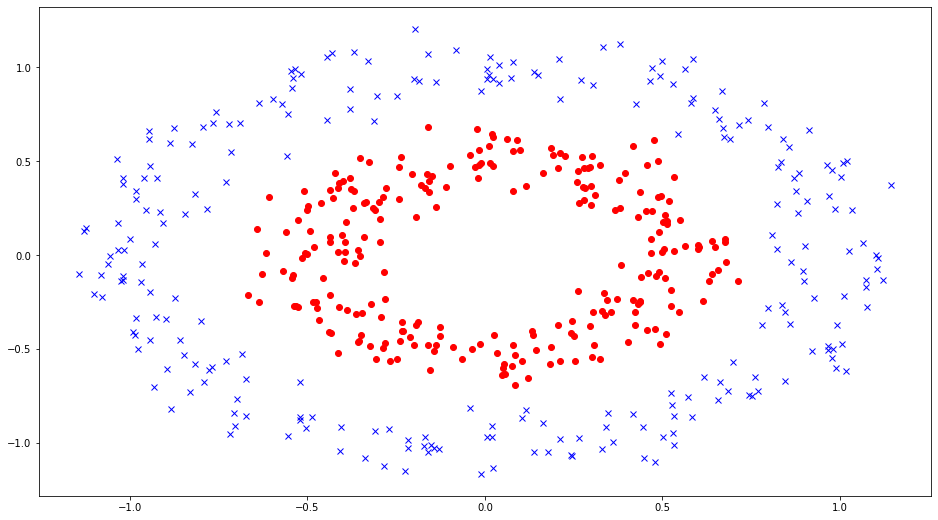

In [8]:
plt.figure(figsize = (16, 9))
plt.plot(class1_x, class1_y, "ro", label = "Clase 1")
plt.plot(class2_x, class2_y, "bx", label = "Clase 2")
plt.show()

In [9]:
batch_size = 500
x_data = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
prediction_grid = tf.placeholder(shape = [None, 2], dtype = tf.float32)
b = tf.Variable(tf.random_normal(shape = [1, batch_size]))

In [10]:
gamma = tf.constant(-50.0)
dist = tf.reduce_sum(tf.square(x_data), 1)
dist = tf.reshape(dist, [-1, 1])
sq_distance = tf.add(tf.subtract(dist, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(x_data)))), tf.transpose(dist))
my_kernel = tf.exp(tf.multiply(gamma, tf.abs(sq_distance)))

In [11]:
first_sum = tf.reduce_sum(b)
b_vect_cross = tf.matmul(tf.transpose(b), b)
y_target_cross = tf.matmul(y_target, tf.transpose(y_target))
second_sum = tf.reduce_sum(tf.multiply(my_kernel, tf.multiply(b_vect_cross, y_target_cross)))
loss = tf.negative(tf.subtract(first_sum, second_sum))

In [12]:
rA = tf.reshape(tf.reduce_sum(tf.square(x_data), 1), [-1, 1])
rB = tf.reshape(tf.reduce_sum(tf.square(prediction_grid), 1), [-1, 1])

pred_sq_dist = tf.add(tf.subtract(rA, tf.multiply(2.0, tf.matmul(x_data, tf.transpose(prediction_grid)))), 
                      tf.transpose(rB))
pred_kernel = tf.exp(tf.multiply(gamma, tf.abs(pred_sq_dist)))

In [13]:
prediction_output = tf.matmul(tf.multiply(tf.transpose(y_target), b), pred_kernel)
prediction = tf.sign(prediction_output - tf.reduce_mean(prediction_output))

In [14]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.squeeze(prediction), tf.squeeze(y_target)), tf.float32))

In [15]:
my_optim = tf.train.GradientDescentOptimizer(0.002)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [16]:
loss_vect = []
batch_acc = []
for i in range(5000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = x_vals[rand_idx]
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    acc_temp = session.run(accuracy, feed_dict = {x_data: rand_x, y_target: rand_y, prediction_grid: rand_x})
    batch_acc.append(acc_temp)
    if (i + 1) % 100 == 0:
        print("Paso # " + str(i + 1) + ", Pérdida = " + str(temp_loss) + ", Precisión = " + str(acc_temp))

Paso # 100, Pérdida = 175.61746, Precisión = 0.606
Paso # 200, Pérdida = 110.148254, Precisión = 0.672
Paso # 300, Pérdida = 40.960728, Precisión = 0.73
Paso # 400, Pérdida = 7.266815, Precisión = 0.844
Paso # 500, Pérdida = -1.4486351, Precisión = 0.918
Paso # 600, Pérdida = -7.676365, Precisión = 0.944
Paso # 700, Pérdida = -9.819662, Precisión = 0.984
Paso # 800, Pérdida = -11.230093, Precisión = 0.996
Paso # 900, Pérdida = -12.493649, Precisión = 1.0
Paso # 1000, Pérdida = -12.198305, Precisión = 1.0
Paso # 1100, Pérdida = -11.78394, Precisión = 0.99
Paso # 1200, Pérdida = -12.503457, Precisión = 1.0
Paso # 1300, Pérdida = -12.665403, Precisión = 1.0
Paso # 1400, Pérdida = -12.201181, Precisión = 0.998
Paso # 1500, Pérdida = -11.370973, Precisión = 0.996
Paso # 1600, Pérdida = -12.296094, Precisión = 0.994
Paso # 1700, Pérdida = -12.262201, Precisión = 1.0
Paso # 1800, Pérdida = -11.815073, Precisión = 0.996
Paso # 1900, Pérdida = -11.587064, Precisión = 0.994
Paso # 2000, Pérdida 

In [17]:
x_min, x_max = x_vals[:,0].min() - 1, x_vals[:,0].max() + 1
y_min, y_max = x_vals[:,1].min() - 1, x_vals[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]

In [18]:
[grid_prediction] = session.run(prediction, feed_dict = {x_data: x_vals,
                                                         y_target: np.transpose([y_vals]),
                                                         prediction_grid: grid_points})

In [19]:
grid_prediction

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [20]:
grid_prediction = grid_prediction.reshape(xx.shape)
grid_prediction

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

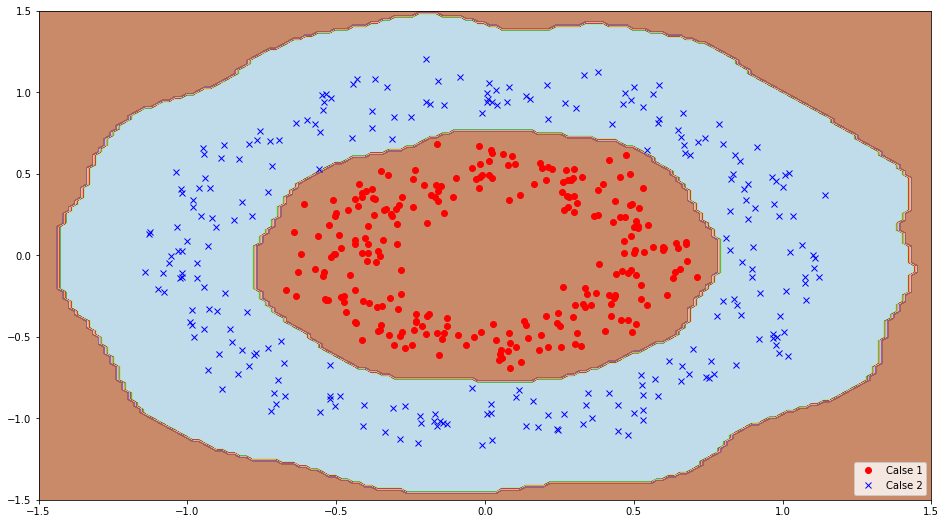

In [21]:
plt.figure(figsize = (16, 9))
plt.contourf(xx, yy, grid_prediction, cmap = plt.cm.Paired, alpha = 0.7)
plt.plot(class1_x, class1_y, "ro", label = "Calse 1")
plt.plot(class2_x, class2_y, "bx", label = "Calse 2")
plt.legend(loc = "lower right")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

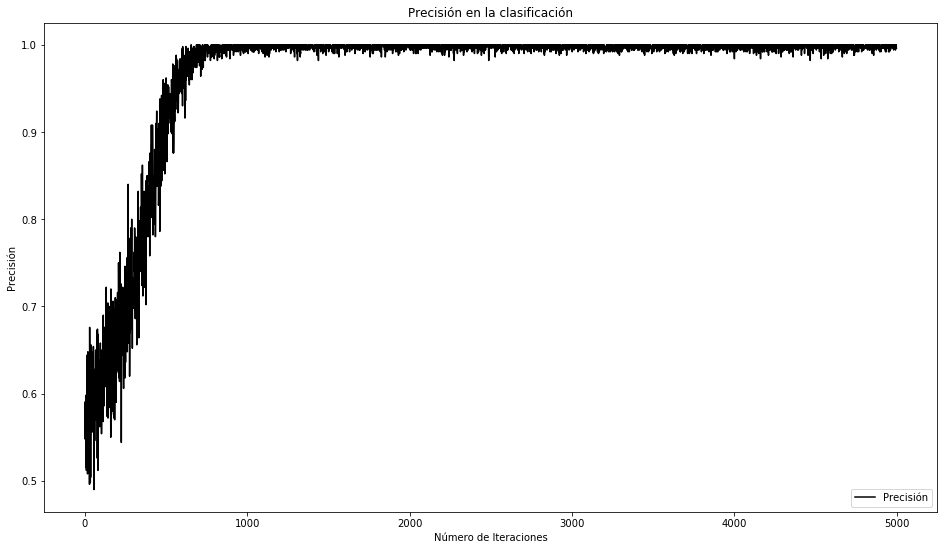

In [22]:
plt.figure(figsize = (16, 9))
plt.plot(batch_acc, "k-", label = "Precisión")
plt.title("Precisión en la clasificación")
plt.xlabel("Número de Iteraciones")
plt.ylabel("Precisión")
plt.legend(loc = "lower right")
plt.show()

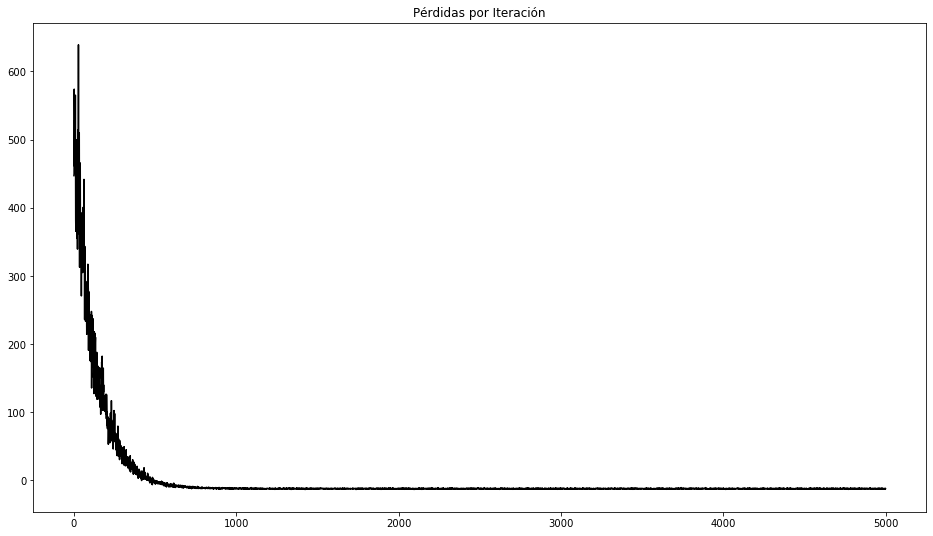

In [23]:
plt.figure(figsize = (16, 9))
plt.plot(loss_vect, "k-")
plt.title("Pérdidas por Iteración")
plt.show()